Alunos: Gustavo Guerreiro e João Martinho

# TRABALHO PARCIAL 02 – Segmentação de objetos

A partir das imagens existentes no dataset disponibilizado, faça a segmentação dos núcleos das células. Utilize apenas técnicas de segmentação e pré-processamento.

Inicia-se importando as bibliotecas necessárias para a execução do trabalho.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Nota-se que as imagens possuem um fundo escuro e o citoplasma e núcleos das células estão em tons de roxo. Como passo inicial pode-se aplicar um limiar para converter o fundo branco em preto isolando a celula no processo, como o citoplasma é mais claro que os núcleos, pode-se aplicar um segundo limiar para isolar o citoplasma dos núcleos sem que o fundo interfira no processo.

In [24]:
def isolar_celula(imagem):
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    ret, mascara = cv2.threshold(imagem_cinza, 10, 255, cv2.THRESH_BINARY)
    fundo_branco = np.full(imagem.shape, 255, dtype=np.uint8)
    resultado_final = np.where(mascara[:, :, None] == 255, imagem, fundo_branco)
    resultado_final_rgb = cv2.cvtColor(resultado_final, cv2.COLOR_BGR2RGB)
    return resultado_final_rgb

imagem = cv2.imread('dataset_neutrofilos/neutrofilo06.png')
imagem_celula = isolar_celula(imagem)

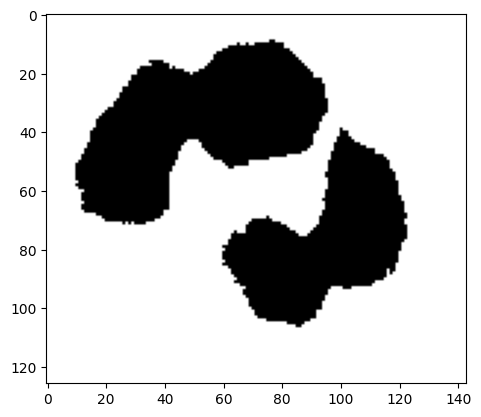

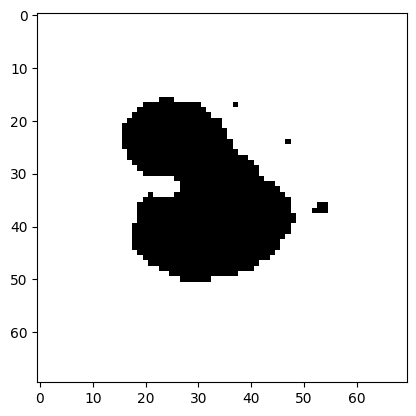

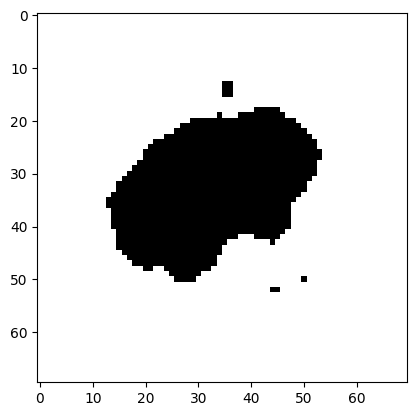

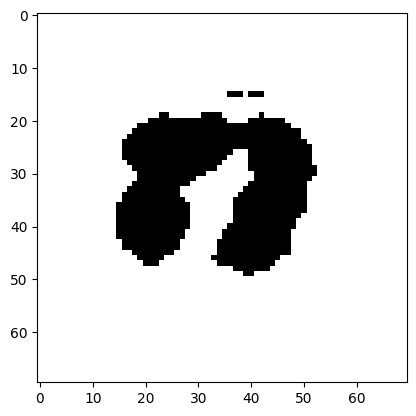

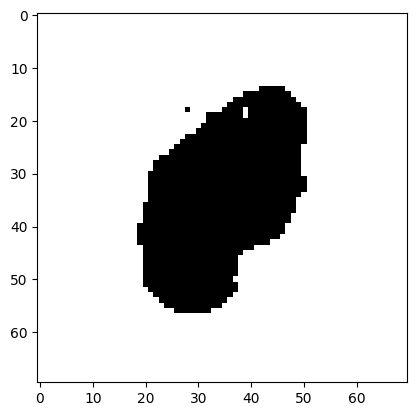

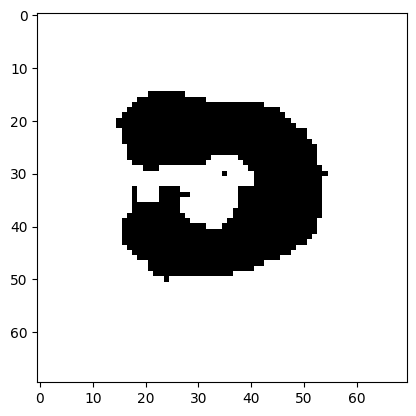

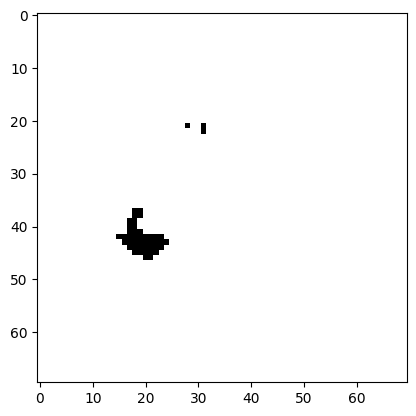

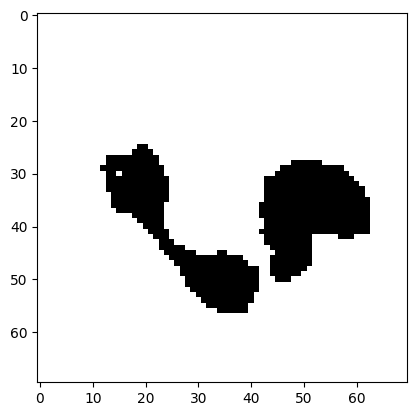

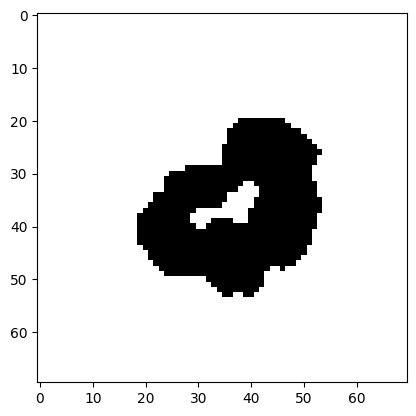

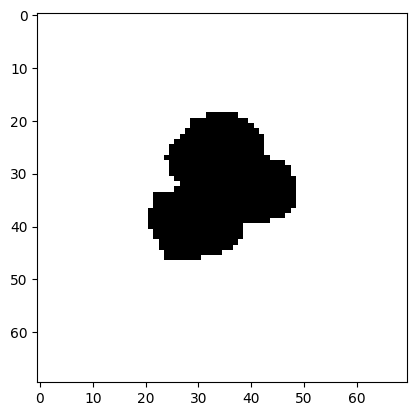

In [40]:

for i in range(10):
    imagem = cv2.imread(f'dataset_neutrofilos/neutrofilo0{i}.png')
    imagem_celula = isolar_celula(imagem)
    imagem_cinza = cv2.cvtColor(imagem_celula, cv2.COLOR_BGR2GRAY)
    _, nucleos = cv2.threshold(imagem_cinza, 100, 255, cv2.THRESH_BINARY)
    plt.imshow(nucleos, cmap='gray')
    plt.show()
